# Load Preprocessed Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../../cleaned-data-kbk.csv', index_col=0)
df.head()

,judul,abstrak,kbk,judul_tokens,abstrak_tokens
0,pengembangan sistem pendukung keputusan untuk ...,sistem pendukung keputusan spk merupakan suatu...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang sistem dukung putus tentu dosen bimbin...,sistem dukung putus spk sistem milik kemampuan...
1,hubungan efikasi diri dengan kesiapan kerja lu...,pandemi covid 19 yang melanda dunia terutama i...,Ketenegakerjaan Teknologi dan Kejuruan,hubung efikasi kesiap kerja lulus smk negeri k...,pandemi covid 19 landa dunia indonesia 2020 da...
2,alat bantu penyandang tuetra berbasis deteksi ...,tujuan dilakukannya penelitian ini untuk memba...,Biomedic and Intelligent Assistive Technology ...,alat bantu sandang tuetra bas deteksi objek re...,tuju laku teliti bantu sandang tuetra gerak ma...
3,analisis thermovisi penghantar akibat transmis...,gardu induk waru merupakan sub transmisi listr...,Intelligent Power Electronics and Smart Grid (...,analisis thermovisi hantar akibat transmission...,gardu induk waru sub transmisi listrik kota si...
4,pengembangan modulberbasis production based ed...,mata pelajaran dasar desain grafis merupakan m...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang modulberbasis production based educati...,mata ajar dasar desain grafis mata ajar wajib ...


In [2]:
df['judtrak'] = [' '.join(i) for i in zip(df['judul'], df['abstrak'])]

# Split Data

In [3]:
from sklearn.model_selection import train_test_split

X = df['judtrak']
y = df['kbk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Extraction: TF-IDF

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape

(884, 12047)

In [5]:
terms = vectorizer.get_feature_names()

sums = X_train_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

               term       rank
12002          yang  78.149528
2172            dan  66.565850
8106   pembelajaran  55.467583
10354         siswa  49.920031
2306         dengan  40.473841
...             ...        ...
4549           isbn   0.010362
399        872e4de9   0.010362
9892       sciences   0.010362
5218           kesy   0.010362
4592        jakarta   0.010362

[12047 rows x 2 columns]


C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



# Oversampling: SMOTE

In [6]:
y_train.value_counts()

Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Strategi Pembelajaran Teknologi dan Kejuruan                                     147
Kurikulum Pendidikan Teknologi dan Kejuruan                                       72
Intelligent Power and Advanced energy System (IPAES)                              68
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)       66
Intelligent Power Electronics and Smart Grid (IPESG)                              64
Ketenegakerjaan Teknologi dan Kejuruan                                            54
Game Technology and Machine Learning Applications                                 53
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                      47
Telematics loT System and Devices                                                 44
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                         41
Biomedic and Intelligent Assistive Technology (TAT)              

In [7]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_tfidf, y_train)

y_train_resampled.value_counts()

Game Technology and Machine Learning Applications                                194
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                        194
Strategi Pembelajaran Teknologi dan Kejuruan                                     194
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)      194
Biomedic and Intelligent Assistive Technology (TAT)                              194
Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Intelligent Power Electronics and Smart Grid (IPESG)                             194
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                     194
Sistem Dinamis, Kendali, dan Robotika (Dynamic Systems, Control and Robotics)    194
Kurikulum Pendidikan Teknologi dan Kejuruan                                      194
Intelligent Power and Advanced energy System (IPAES)                             194
Ketenegakerjaan Teknologi dan Kejuruan                           

# Training Model

## GridSearchCV

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'criterion':['gini','entropy', 'log_loss'],'max_depth':[10, 20, 30, None]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='roc_auc_ovr', cv=10, verbose=3)

# fitting the model for grid search
grid.fit(X_train_resampled, y_train_resampled)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .....criterion=gini, max_depth=10;, score=0.849 total time=   0.6s
[CV 2/10] END .....criterion=gini, max_depth=10;, score=0.864 total time=   0.7s
[CV 3/10] END .....criterion=gini, max_depth=10;, score=0.871 total time=   0.6s
[CV 4/10] END .....criterion=gini, max_depth=10;, score=0.914 total time=   0.5s
[CV 5/10] END .....criterion=gini, max_depth=10;, score=0.933 total time=   0.5s
[CV 6/10] END .....criterion=gini, max_depth=10;, score=0.929 total time=   0.6s
[CV 7/10] END .....criterion=gini, max_depth=10;, score=0.953 total time=   0.6s
[CV 8/10] END .....criterion=gini, max_depth=10;, score=0.933 total time=   0.5s
[CV 9/10] END .....criterion=gini, max_depth=10;, score=0.951 total time=   0.6s
[CV 10/10] END ....criterion=gini, max_depth=10;, score=0.945 total time=   0.6s
[CV 1/10] END .....criterion=gini, max_depth=20;, score=0.846 total time=   0.7s
[CV 2/10] END .....criterion=gini, max_depth=2

[CV 2/10] END .criterion=log_loss, max_depth=30;, score=0.834 total time=   1.3s
[CV 3/10] END .criterion=log_loss, max_depth=30;, score=0.865 total time=   1.3s
[CV 4/10] END .criterion=log_loss, max_depth=30;, score=0.890 total time=   1.4s
[CV 5/10] END .criterion=log_loss, max_depth=30;, score=0.941 total time=   1.4s
[CV 6/10] END .criterion=log_loss, max_depth=30;, score=0.941 total time=   1.3s
[CV 7/10] END .criterion=log_loss, max_depth=30;, score=0.940 total time=   1.3s
[CV 8/10] END .criterion=log_loss, max_depth=30;, score=0.924 total time=   1.3s
[CV 9/10] END .criterion=log_loss, max_depth=30;, score=0.951 total time=   1.4s
[CV 10/10] END criterion=log_loss, max_depth=30;, score=0.948 total time=   1.3s
[CV 1/10] END criterion=log_loss, max_depth=None;, score=0.810 total time=   1.3s
[CV 2/10] END criterion=log_loss, max_depth=None;, score=0.832 total time=   1.3s
[CV 3/10] END criterion=log_loss, max_depth=None;, score=0.854 total time=   1.3s
[CV 4/10] END criterion=l

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, None]},
             scoring='roc_auc_ovr', verbose=3)

In [9]:
# Tabel hasil GridSearchCV
results_df = pd.DataFrame(grid.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.666650,0.037384,0.007303,0.000464,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.849127,0.864295,0.871237,0.913813,0.932666,0.928831,0.952814,0.933432,0.951134,0.944895,0.914224,0.036460,3
1,0.814054,0.015363,0.007101,0.000288,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.846488,0.849328,0.859680,0.918247,0.949063,0.934390,0.943558,0.938964,0.950652,0.941429,0.913180,0.041158,4
2,0.840093,0.015634,0.006499,0.000500,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.828822,0.820851,0.846826,0.924070,0.936995,0.934105,0.954830,0.937310,0.952675,0.939901,0.907638,0.050449,5
3,0.842694,0.018351,0.006501,0.000505,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.824744,0.812331,0.836220,0.917703,0.943378,0.937111,0.950551,0.933031,0.946066,0.944078,0.904521,0.053382,7
4,1.325523,0.039446,0.007102,0.000537,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.872285,0.876922,0.887979,0.903168,0.937357,0.934672,0.942391,0.927393,0.954424,0.955793,0.919239,0.029957,1
5,1.433889,0.047067,0.006397,0.000491,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.805753,0.829333,0.862188,0.898701,0.921682,0.936908,0.941693,0.919692,0.948456,0.941485,0.900589,0.048303,10
6,1.435095,0.053587,0.006599,0.000489,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.814102,0.840074,0.864482,0.892237,0.934717,0.934820,0.935225,0.919890,0.944179,0.943676,0.902340,0.044889,9
7,1.429782,0.050531,0.006598,0.000491,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.805245,0.820880,0.871052,0.877110,0.936808,0.934820,0.941794,0.911135,0.948455,0.943675,0.899097,0.050285,12
8,1.331919,0.061779,0.007197,0.001161,log_loss,10,"{'criterion': 'log_loss', 'max_depth': 10}",0.873672,0.865039,0.885192,0.903446,0.924673,0.939392,0.937400,0.929691,0.938705,0.958049,0.915526,0.030074,2
9,1.486828,0.103045,0.006792,0.000397,log_loss,20,"{'criterion': 'log_loss', 'max_depth': 20}",0.811509,0.842260,0.857911,0.904960,0.939198,0.941186,0.937414,0.919691,0.950645,0.943876,0.904865,0.047153,6


In [10]:
# Peringkat Score Parameter hasil GridSearchCV
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("criterion")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
criterion,,,,
entropy_10,"{'criterion': 'entropy', 'max_depth': 10}",1,0.919239,0.029957
log_loss_10,"{'criterion': 'log_loss', 'max_depth': 10}",2,0.915526,0.030074
gini_10,"{'criterion': 'gini', 'max_depth': 10}",3,0.914224,0.036460
gini_20,"{'criterion': 'gini', 'max_depth': 20}",4,0.913180,0.041158
gini_30,"{'criterion': 'gini', 'max_depth': 30}",5,0.907638,0.050449
log_loss_20,"{'criterion': 'log_loss', 'max_depth': 20}",6,0.904865,0.047153
gini_None,"{'criterion': 'gini', 'max_depth': None}",7,0.904521,0.053382
log_loss_30,"{'criterion': 'log_loss', 'max_depth': 30}",8,0.904311,0.049089
entropy_30,"{'criterion': 'entropy', 'max_depth': 30}",9,0.902340,0.044889


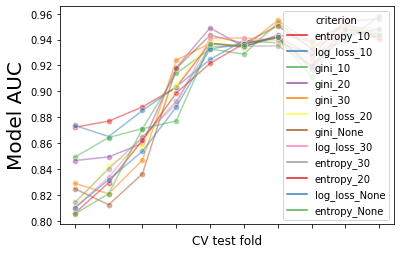

Correlation of models:
 criterion      entropy_10  log_loss_10   gini_10   gini_20   gini_30  \
criterion                                                              
entropy_10       1.000000     0.973442  0.965857  0.946220  0.929611   
log_loss_10      0.973442     1.000000  0.943682  0.929920  0.929011   
gini_10          0.965857     0.943682  1.000000  0.980647  0.980890   
gini_20          0.946220     0.929920  0.980647  1.000000  0.989553   
gini_30          0.929611     0.929011  0.980890  0.989553  1.000000   
log_loss_20      0.962287     0.938868  0.977905  0.975239  0.963233   
gini_None        0.936947     0.940246  0.975698  0.993168  0.996164   
log_loss_30      0.975077     0.955178  0.971943  0.965960  0.951324   
entropy_30       0.974128     0.953624  0.976035  0.967358  0.953605   
entropy_20       0.962564     0.952201  0.980998  0.962588  0.965400   
log_loss_None    0.981250     0.965898  0.981718  0.969864  0.959217   
entropy_None     0.971483     0.947905  

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=20)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

In [12]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
model = clf.fit(X_train_resampled,y_train_resampled)

[Text(0.6743527006937562, 0.9545454545454546, 'X[10427] <= 0.0\nentropy = 3.7\nsamples = 2522\nvalue = [194, 194, 194, 194, 194, 194, 194, 194, 194, 194\n194, 194, 194]'),
 Text(0.4822224975222993, 0.8636363636363636, 'X[5849] <= 0.024\nentropy = 3.482\nsamples = 1772\nvalue = [183, 25, 192, 194, 194, 61, 50, 74, 174, 194, 43\n194, 194]'),
 Text(0.3540634291377602, 0.7727272727272727, 'X[10122] <= 0.0\nentropy = 3.324\nsamples = 1355\nvalue = [174, 24, 192, 40, 15, 56, 42, 60, 173, 188, 33\n194, 164]'),
 Text(0.24529236868186324, 0.6818181818181818, 'X[662] <= 0.03\nentropy = 3.212\nsamples = 986\nvalue = [40, 24, 183, 38, 11, 56, 41, 54, 173, 130, 33\n189, 14]'),
 Text(0.1565906838453915, 0.5909090909090909, 'X[5998] <= 0.026\nentropy = 3.262\nsamples = 730\nvalue = [29, 24, 75, 23, 9, 56, 41, 51, 62, 130, 33, 183\n14]'),
 Text(0.10059464816650149, 0.5, 'X[7749] <= 0.0\nentropy = 2.865\nsamples = 541\nvalue = [29, 11, 66, 22, 8, 9, 4, 21, 38, 124, 12, 183\n14]'),
 Text(0.0604558969276

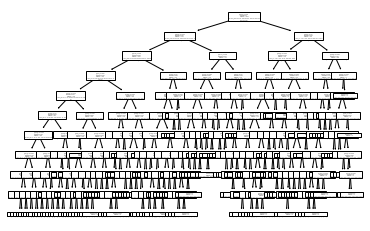

In [13]:
from sklearn import tree

tree.plot_tree(model) 

In [14]:
print('Decision Tree depth : ',model.get_depth())
print('Decision Tree n leaves : ',model.get_n_leaves())

Decision Tree depth :  10
Decision Tree n leaves :  189


# Evaluation

In [15]:
predictions = model.predict(X_test_tfidf)

In [16]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[ 2  0  4  2  0  0  0  0  1  1  0  1  2]
 [ 0  5  2  0  0  1  2  1  0  0  4  0  0]
 [ 1  0 13  2  0  1  0  2  6  0  0  2  0]
 [ 0  0  4 10  6  0  0  0  2  1  0  1  0]
 [ 0  0  0  3 15  1  0  2  1  0  0  0  0]
 [ 0  2  4  1  0 11  8  1  1  2  1  0  0]
 [ 1  1  1  0  0  6  5  2  0  0  6  1  0]
 [ 1  5  3  1  0  2  4 54  1  1 11  3  2]
 [ 2  2  8  1  1  0  2  0 16  0  0  1  0]
 [ 0  0  1  1  1  0  0  0  0  2  0  0  2]
 [ 0  7  1  0  0  1  3 14  1  0 34  1  0]
 [ 0  0  5  0  0  0  1  2  3  1  1  8  0]
 [ 1  0  1  3  2  0  0  2  1  2  0  0  2]]


C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


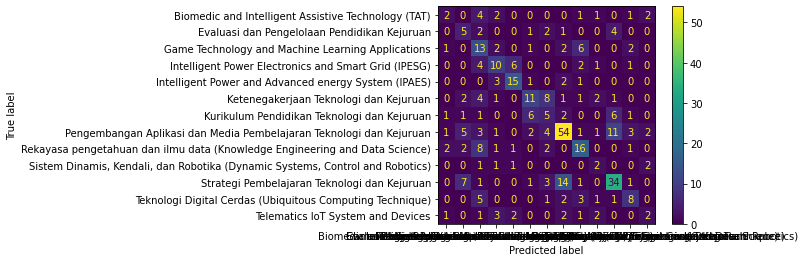

In [17]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test_tfidf, y_test) 
plt.show()

In [18]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

                                                                               precision    recall  f1-score   support

                          Biomedic and Intelligent Assistive Technology (TAT)       0.25      0.15      0.19        13
                                 Evaluasi dan Pengelolaan Pendidikan Kejuruan       0.23      0.33      0.27        15
                            Game Technology and Machine Learning Applications       0.28      0.48      0.35        27
                         Intelligent Power Electronics and Smart Grid (IPESG)       0.42      0.42      0.42        24
                         Intelligent Power and Advanced energy System (IPAES)       0.60      0.68      0.64        22
                                       Ketenegakerjaan Teknologi dan Kejuruan       0.48      0.35      0.41        31
                                  Kurikulum Pendidikan Teknologi dan Kejuruan       0.20      0.22      0.21        23
          Pengembangan Aplikasi dan Media Pembe

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions))
print('Precision score : ', precision_score(y_test, predictions, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions, average='weighted'))

Accuracy score :  0.46578947368421053
Precision score :  0.48255013801494695
Recall score :  0.46578947368421053
F1 score :  0.469180206549698


# Export Model

In [20]:
from joblib import dump

dump(model, filename="model/dtc-model-judtrak.joblib")
dump(vectorizer, filename="model/vectorizer_model_judtrak.joblib")

['model/vectorizer_model_judtrak.joblib']

# Demo

In [21]:
title_input = input("Masukkan Judul dan Abstrak Skripsi:\n")

'''
catatan input:
klasifikasi judul skripsi berdasarkan kbk dengan metode decision tree sisinta um adalah sistem informasi berbasis website bertujuan untuk menampilkan data yang berkaitan dengan skripsi dan tugas akhir pada jurusan teknik elektro fakultas teknik universitas negeri malang. penggunaan sistem informasi sisinta memiliki potensi jika dikembangkan dengan mengklasifikasikan judul dan abstrak berdasarkan tema penelitiannya. tujuan penelitian ini adalah untuk menerapkan dan menguji performa algoritma decision tree classifier dalam mengklasifikasi judul skripsi dan tugas akhir, berdasarkan tema penelitian dalam kbk di jurusan teknik elektro ft um. decision tree classifier adalah algoritma supervised learning non-parametrik, yang digunakan untuk klasifikasi dan regresi. decision tree memiliki hierarki, struktur pohon, yang terdiri dari root node, branches, internal nodes dan leaf nodes. dengan menggunakan metode decision tree classifier dalam implementasinya diharapkan dapat memprediksi jenis kelompok bidang keahlian yang sesuai. data yang digunakan dalam penelitian sistem klasifikasi ini didapatkan dari database sisinta te-um berupa judul, abstrak, dan kbk yang terkait dengan tema penelitian pada skripsi dan tugas akhir tersebut.
'''

hasil = clf.predict_proba(vectorizer.transform([title_input]))

print(f"Judul dan Abstrak Skripsi: {title_input}")

list1 = hasil.tolist()
cls = clf.classes_
list2 = cls.tolist()

d = {"Kelompok Bidang Keahlian":list2,"Probability":list1[0]}
df_proba = pd.DataFrame(d)

print(df_proba.sort_values("Probability", ascending=False))

Masukkan Judul dan Abstrak Skripsi:
klasifikasi judul skripsi berdasarkan kbk dengan metode decision tree sisinta um adalah sistem informasi berbasis website bertujuan untuk menampilkan data yang berkaitan dengan skripsi dan tugas akhir pada jurusan teknik elektro fakultas teknik universitas negeri malang. penggunaan sistem informasi sisinta memiliki potensi jika dikembangkan dengan mengklasifikasikan judul dan abstrak berdasarkan tema penelitiannya. tujuan penelitian ini adalah untuk menerapkan dan menguji performa algoritma decision tree classifier dalam mengklasifikasi judul skripsi dan tugas akhir, berdasarkan tema penelitian dalam kbk di jurusan teknik elektro ft um. decision tree classifier adalah algoritma supervised learning non-parametrik, yang digunakan untuk klasifikasi dan regresi. decision tree memiliki hierarki, struktur pohon, yang terdiri dari root node, branches, internal nodes dan leaf nodes. dengan menggunakan metode decision tree classifier dalam implementasinya dih